In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# -----------------------
# Load your dataset
# -----------------------
df = pd.read_csv(r"C:\Users\chloe\OneDrive\Desktop\Data Analytics\Mental_Health_and_Social_Media_Balance_Dataset.csv")

def categorize_happiness(h):
    if 4 <= h < 8:
        return "Low"
    elif 8 <= h < 10:
        return "Medium"
    elif h == 10:
        return "High"
    else:
        return None

df["Happiness_Group"] = df["Happiness_Index(1-10)"].apply(categorize_happiness)
y = df['Happiness_Group']   

X = df[['Stress_Level(1-10)', 'Sleep_Quality(1-10)', 'Daily_Screen_Time(hrs)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


                                


In [35]:
group_breakdown = df["Happiness_Group"].value_counts().reset_index()
group_breakdown.columns = ["Happiness_Group", "Count"]
group_breakdown["Percentage"] = (
    df["Happiness_Group"].value_counts(normalize=True).values * 100
)

print(group_breakdown)


  Happiness_Group  Count  Percentage
0          Medium    200        40.0
1            High    162        32.4
2             Low    138        27.6


In [47]:
# -----------------------
# 1. Logistic Regression
# -----------------------
pipe_log = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(multi_class='multinomial'))
])

params_log = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['lbfgs', 'saga']
}

grid_log = GridSearchCV(pipe_log, params_log, cv=5)
grid_log.fit(X_train, y_train)

log_pred = grid_log.predict(X_test)

print("\nBest Logistic Regression:", grid_log.best_params_)
print("Accuracy:", accuracy_score(y_test, log_pred))


# -----------------------
# 2. Random Forest Classifier
# -----------------------
pipe_rf = Pipeline([
    ('model', RandomForestClassifier())
])

params_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(pipe_rf, params_rf, cv=5)
grid_rf.fit(X_train, y_train)

rf_pred = grid_rf.predict(X_test)

print("\nBest Random Forest:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, rf_pred))


# -----------------------
# 3. Support Vector Machine (SVC)
# -----------------------
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

params_svc = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['rbf', 'linear'],
    'model__gamma': ['scale', 'auto']
}

grid_svc = GridSearchCV(pipe_svc, params_svc, cv=5)
grid_svc.fit(X_train, y_train)

svc_pred = grid_svc.predict(X_test)

print("\nBest SVM:", grid_svc.best_params_)
print("Accuracy:", accuracy_score(y_test, svc_pred))


# -----------------------
# 4. KNN Classifier
# -----------------------
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

params_knn = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]
}

grid_knn = GridSearchCV(pipe_knn, params_knn, cv=5)
grid_knn.fit(X_train, y_train)

knn_pred = grid_knn.predict(X_test)

print("\nBest KNN:", grid_knn.best_params_)
print("Accuracy:", accuracy_score(y_test, knn_pred))




C:\Users\chloe\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chloe\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chloe\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chloe\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in ve


Best Logistic Regression: {'model__C': 1, 'model__solver': 'lbfgs'}
Accuracy: 0.68

Best Random Forest: {'model__max_depth': 5, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Accuracy: 0.66

Best SVM: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Accuracy: 0.67

Best KNN: {'model__n_neighbors': 9, 'model__p': 1, 'model__weights': 'uniform'}
Accuracy: 0.7


In [51]:
y_numeric = df["Happiness_Index(1-10)"]
scaler_y = StandardScaler()


y_scaled_2d = scaler_y.fit_transform(y_numeric.values.reshape(-1, 1))
y_scaled = y_scaled_2d.ravel()

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y_scaled, test_size=0.2, random_state=42
)



First 10 scaled values: [ 1.06652456  1.06652456 -1.56038323 -0.24692933 -0.24692933 -0.24692933
 -0.90365628 -0.90365628  0.40979761 -0.90365628]


In [45]:

# -----------------------
# 1. Linear Regression
# -----------------------
pipe_lin = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

params_lin = {
    'model__fit_intercept': [True, False],
    'model__positive': [False, True]
}

grid_lin = GridSearchCV(pipe_lin, params_lin, cv=5)
grid_lin.fit(X_train1, y_train1)

print("\nBest Linear Regression params:", grid_lin.best_params_)

y_pred1 = grid_lin.predict(X_test1)

print("\nMSE:", mean_squared_error(y_test1, y_pred1))
print("R²:", r2_score(y_test1, y_pred1))

# -----------------------
# 2. Random Forest (Regressor)
# -----------------------
pipe_rf = Pipeline([
    ('model', RandomForestRegressor(random_state=42))
])

params_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(pipe_rf, params_rf, cv=5)
grid_rf.fit(X_train1, y_train1)

print("\nBest Random Forest params:", grid_rf.best_params_)

y_pred_rf = grid_rf.predict(X_test1)

print("\n[Random Forest Regressor]")
print("MSE:", mean_squared_error(y_test1, y_pred_rf))
print("R²:", r2_score(y_test1, y_pred_rf))

# -----------------------
# 3. Support Vector Machine (SVR)
# -----------------------
pipe_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR())
])

params_svr = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['rbf', 'linear'],
    'model__gamma': ['scale', 'auto']
}

grid_svr = GridSearchCV(pipe_svr, params_svr, cv=5)
grid_svr.fit(X_train1, y_train1)

print("\nBest SVR params:", grid_svr.best_params_)

y_pred_svr = grid_svr.predict(X_test1)

print("\n[SVR]")
print("MSE:", mean_squared_error(y_test1, y_pred_svr))
print("R²:", r2_score(y_test1, y_pred_svr))

# -----------------------
# 4. KNN Regressor
# -----------------------
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
])

params_knn = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

grid_knn = GridSearchCV(pipe_knn, params_knn, cv=5)
grid_knn.fit(X_train1, y_train1)

print("\nBest KNN params:", grid_knn.best_params_)

y_pred_knn = grid_knn.predict(X_test1)

print("\n[KNN Regressor]")
print("MSE:", mean_squared_error(y_test1, y_pred_knn))
print("R²:", r2_score(y_test1, y_pred_knn))


Best Linear Regression params: {'model__fit_intercept': False, 'model__positive': False}

MSE: 0.40059850101980904
R²: 0.6090093875953217

Best Random Forest params: {'model__max_depth': 5, 'model__min_samples_split': 10, 'model__n_estimators': 300}

[Random Forest Regressor]
MSE: 0.34197605790338753
R²: 0.6662258396699006

Best SVR params: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'linear'}

[SVR]
MSE: 0.4022568277419117
R²: 0.6073908339087968

Best KNN params: {'model__n_neighbors': 9, 'model__p': 1, 'model__weights': 'uniform'}

[KNN Regressor]
MSE: 0.3729862258023788
R²: 0.6359594145416676


In [53]:
## This code was taken from Chat GPT
def binned_accuracy(true_vals, pred_vals):
    true_bins = [categorize_happiness(h) for h in true_vals]
    pred_bins = [categorize_happiness(h) for h in pred_vals]

    valid_idx = [
        i for i, (t, p) in enumerate(zip(true_bins, pred_bins))
        if t is not None and p is not None
    ]

    y_true_valid = [true_bins[i] for i in valid_idx]
    y_pred_valid = [pred_bins[i] for i in valid_idx]

    return accuracy_score(y_true_valid, y_pred_valid)

# -------------------------------------------------------
# Undo scaling 
# -------------------------------------------------------
y_test_orig = scaler_y.inverse_transform(y_test1.reshape(-1, 1)).ravel()

numeric_accs = {}

# -------------------------------------------------------
# BEST NUMERIC MODELS 
# -------------------------------------------------------

# 1) Linear Regression
pipe_lin = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression(fit_intercept=False, positive=False))
])
pipe_lin.fit(X_train1, y_train1)
lin_pred_scaled = pipe_lin.predict(X_test1)
lin_pred_orig = scaler_y.inverse_transform(lin_pred_scaled.reshape(-1, 1)).ravel()
numeric_accs["Linear Regression (Reg)"] = binned_accuracy(y_test_orig, lin_pred_orig)

# 2) Random Forest Regressor
pipe_rf_reg = Pipeline([
    ('model', RandomForestRegressor(
        max_depth=5,
        min_samples_split=10,
        n_estimators=300,
        random_state=42
    ))
])
pipe_rf_reg.fit(X_train1, y_train1)
rf_reg_pred_scaled = pipe_rf_reg.predict(X_test1)
rf_reg_pred_orig = scaler_y.inverse_transform(rf_reg_pred_scaled.reshape(-1, 1)).ravel()
numeric_accs["Random Forest (Reg)"] = binned_accuracy(y_test_orig, rf_reg_pred_orig)

# 3) SVR Regressor
pipe_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(C=10, gamma='scale', kernel='linear'))
])
pipe_svr.fit(X_train1, y_train1)
svr_pred_scaled = pipe_svr.predict(X_test1)
svr_pred_orig = scaler_y.inverse_transform(svr_pred_scaled.reshape(-1, 1)).ravel()
numeric_accs["SVR (Reg)"] = binned_accuracy(y_test_orig, svr_pred_orig)

# 4) KNN Regressor
pipe_knn_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(
        n_neighbors=9,
        p=1,
        weights='uniform'
    ))
])
pipe_knn_reg.fit(X_train1, y_train1)
knn_reg_pred_scaled = pipe_knn_reg.predict(X_test1)
knn_reg_pred_orig = scaler_y.inverse_transform(knn_reg_pred_scaled.reshape(-1, 1)).ravel()
numeric_accs["KNN (Reg)"] = binned_accuracy(y_test_orig, knn_reg_pred_orig)

# -------------------------------------------------------
# BEST CATEGORICAL MODELS 
# -------------------------------------------------------
cat_accs = {}

# 1) Logistic Regression
pipe_log = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        C=1,
        solver='lbfgs',
        multi_class='multinomial',
        max_iter=1000))])

pipe_log.fit(X_train, y_train)
log_pred = pipe_log.predict(X_test)
cat_accs["Logistic Regression (Clf)"] = accuracy_score(y_test, log_pred)

# 2) Random Forest Classifier
pipe_rf_clf = Pipeline([
    ('model', RandomForestClassifier(
        max_depth=5,
        min_samples_split=10,
        n_estimators=200,
        random_state=42
    ))
])
pipe_rf_clf.fit(X_train, y_train)
rf_clf_pred = pipe_rf_clf.predict(X_test)
cat_accs["Random Forest (Clf)"] = accuracy_score(y_test, rf_clf_pred)

# 3) SVM Classifier
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(
        C=0.1,
        gamma='scale',
        kernel='linear'
    ))
])
pipe_svc.fit(X_train, y_train)
svc_pred = pipe_svc.predict(X_test)
cat_accs["SVM (Clf)"] = accuracy_score(y_test, svc_pred)

# 4) KNN Classifier
pipe_knn_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(
        n_neighbors=9,
        p=1,
        weights='uniform'
    ))
])
pipe_knn_clf.fit(X_train, y_train)
knn_clf_pred = pipe_knn_clf.predict(X_test)
cat_accs["KNN (Clf)"] = accuracy_score(y_test, knn_clf_pred)

# -------------------------------------------------------
#  COMBINE RESULTS
# -------------------------------------------------------
all_models = list(numeric_accs.keys()) + list(cat_accs.keys())
all_accs = list(numeric_accs.values()) + list(cat_accs.values())
all_types = (["Numeric (binned)"] * 4) + (["Categorical"] * 4)

acc_df = pd.DataFrame({
    "Model": all_models,
    "Accuracy": all_accs,
    "Type": all_types
})

print("\nFINAL ACCURACY COMPARISON:")
print(acc_df)


C:\Users\chloe\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



FINAL ACCURACY COMPARISON:
                       Model  Accuracy              Type
0    Linear Regression (Reg)  0.545455  Numeric (binned)
1        Random Forest (Reg)  0.490000  Numeric (binned)
2                  SVR (Reg)  0.534091  Numeric (binned)
3                  KNN (Reg)  0.570000  Numeric (binned)
4  Logistic Regression (Clf)  0.680000       Categorical
5        Random Forest (Clf)  0.660000       Categorical
6                  SVM (Clf)  0.670000       Categorical
7                  KNN (Clf)  0.700000       Categorical


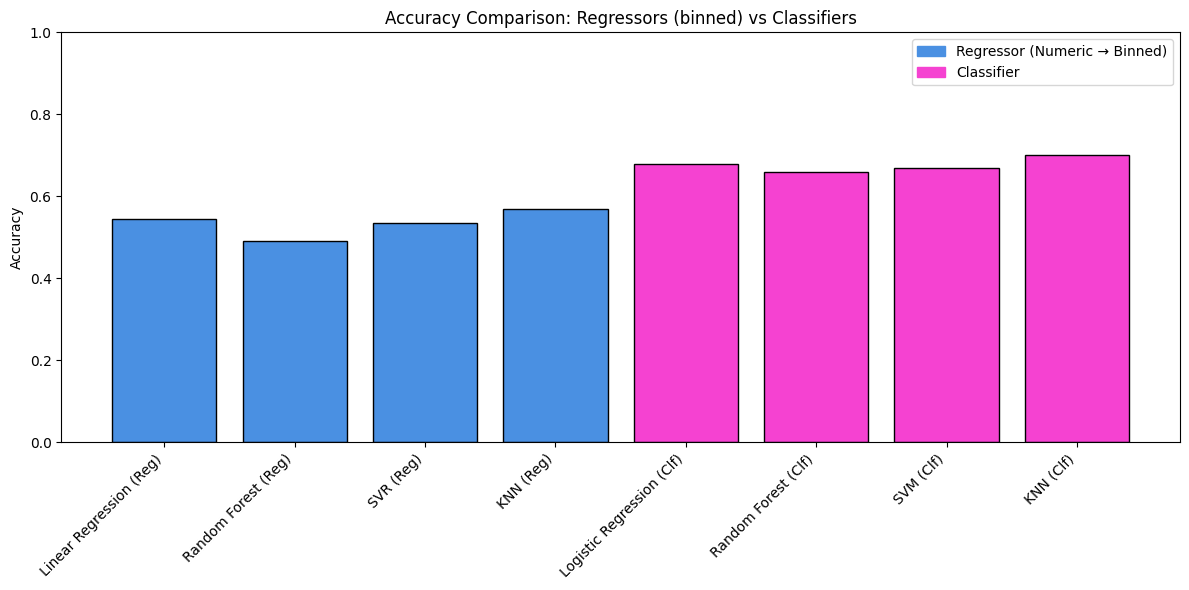

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Color map
color_map = {
    "Numeric (binned)": "#4A90E2",  
    "Categorical": "#f542d1"        
}

colors = [color_map[t] for t in acc_df["Type"]]

plt.figure(figsize=(12, 6))

x = np.arange(len(acc_df))
plt.bar(x, acc_df["Accuracy"], color=colors, edgecolor="black")

plt.xticks(x, acc_df["Model"], rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Accuracy Comparison: Regressors (binned) vs Classifiers")

# Create legend patches
import matplotlib.patches as mpatches
reg_patch = mpatches.Patch(color="#4A90E2", label="Regressor (Numeric → Binned)")
clf_patch = mpatches.Patch(color="#f542d1", label="Classifier")

plt.legend(handles=[reg_patch, clf_patch])

plt.tight_layout()
plt.show()
